<a href="https://colab.research.google.com/github/GregoryAlbarian/Neural-Network-using-MNIST/blob/main/Neural_Networks_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks on MNIST Handwritten Digit Dataset

In [ ]:
from IPython.display import Image
Image("Screen Shot 2021-04-26 at 2.33.41 PM.png")

### Imports and Preprocessing Data



In [ ]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.datasets import mnist
import keras

# load train and test dataset
# load dataset
import keras
(trainX, trainY), (testX, testY) = mnist.load_data()

# Prepare Pixel Data
# convert from integers to floats


# 0-9 numbered images
num_classes = 10

# flatten the data
# trainX = trainX.reshape(-1, 784) #28*28=784
# testX = testX.reshape(-1, 784)

train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0 #Data normalization is an important step which ensures that each input parameter (pixel, in this case)
#has a similar data distribution. This makes convergence faster while training the network


# one hot encode target values
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)
train_norm.shape , test_norm.shape

((60000, 28, 28), (10000, 28, 28))

### Convolutional Neural Network (CNN)

In [ ]:
# your code goes here
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# output part of the model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model

# one hot encode target values

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

opt = SGD(lr=0.001, momentum=0.9)
# compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainY, epochs=32, batch_size=64, validation_data=(testX, testY), verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.910


### Fully Connected Neural Network (FCNN)

In [ ]:
# your code goes here 

In [ ]:
 building the neural network

(trainX, trainY), (testX, testY) = mnist.load_data()

# flatten the data
trainX = trainX.reshape(-1, 784) #28*28=784
testX = testX.reshape(-1, 784)


train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0 #Data normalization is an important step which ensures that each input parameter (pixel, in this case)
#has a similar data distribution. This makes convergence faster while training the network


# one hot encode target values
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)
train_norm.shape , test_norm.shape

model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(240, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', # notice this isn't MSE because we're not doing regression
    optimizer=SGD(),
    metrics=['accuracy'])            # want to monitor accuracy over training


# 128 images in each batch
batch_size = 128
# train for 5 steps
epochs = 32

history = model.fit(
    trainX, trainY,                 # training data to learn from 
    batch_size=batch_size,            # size of batches
    epochs=epochs,                    # how many iterations we train for 
    validation_data=(testX, testY)) # validation data to test on



Epoch 1/32
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0978 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/32
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/32
469/469 [============================

__The CNN with VGG block gave better results than the FCNN. This is because the CNN takes into account the placement of parts within the images better using convolutions. I used are 32 epochs for each__

### Autoencoder

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_23 (Dense)             (None, 784)               25872     
Total params: 25,872
Trainable params: 2

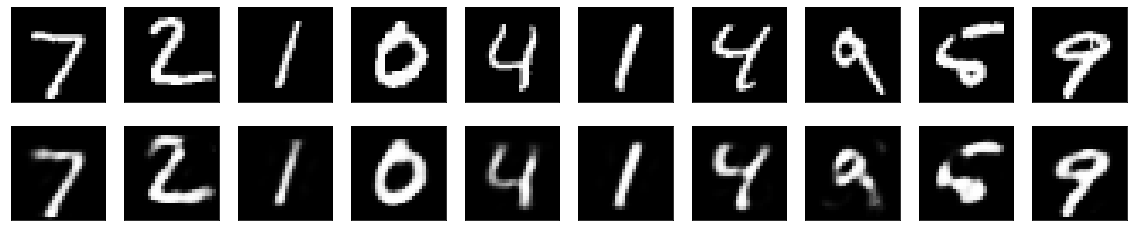

In [ ]:
# Your code goes here

import keras
from keras import layers

##### We'll start simple, with a single fully-connected neural layer as encoder and as decoder:

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

autoencoder.summary()

############################################################################## Encoder model

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

##############################################################################  Decoder model
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
############################################################################## 
decoder.summary()

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=32,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
